# Sparse Hebbian Learning: basics

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

homeo_method = 'HEH'
matname = 'quantization_' + homeo_method
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method=homeo_method, eta_homeo=0.05, alpha_homeo=0.02, C=5., nb_quant=128, P_cum=None, verbose=verbose)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname='quantization')

Extracting data..loading the data called : data_cache/quantization_data
Data is of shape : (81920, 169) - done in 0.06s.


In [5]:
!ls -l {shl.data_cache}/{matname}*

ls: cannot access 'data_cache/quantization_HEH*': No such file or directory


In [6]:
!ls -l {shl.data_cache}/{matname}*

ls: cannot access 'data_cache/quantization_HEH*': No such file or directory


In [7]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (81920, 169)
average of patches =  6.8445000669491905e-06  +/-  0.006296589806284218
average energy of data =  0.06112448333671787 +/- 0.06905193929665134


In [8]:
shl.do_precision

False

## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found data_cache/quantization_HEH_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   1 /   8193 (elapsed time:   1s,   0mn   1s)
Iteration  129 /   8193 (elapsed time:  102s,   1mn  42s)
Iteration  257 /   8193 (elapsed time:  202s,   3mn  22s)
Iteration  385 /   8193 (elapsed time:  297s,   4mn  57s)
Iteration  513 /   8193 (elapsed time:  394s,   6mn  34s)
Iteration  641 /   8193 (elapsed time:  490s,   8mn  10s)
Iteration  769 /   8193 (elapsed time:  585s,   9mn  45s)
Iteration  897 /   8193 (elapsed time:  680s,  11mn  20s)
Iteration  1025 /   8193 (elapsed time:  779s,  12mn  59s)
Iteration  1153 /   8193 (elapsed time:  876s,  14mn  36s)
Iteration  1281 /   8193 (elapsed time:  973s,  16mn  13s)
Iteration  1409 /   8193 (elapsed time:  1067s,  17mn  47s)
Iteration  1537 /   8193 (elapsed time:  1161s,  19mn  21s)
Iteration  1665 /   8193 (elapsed time:  1257s,  20mn  57s)
Iteration  1793 /   8193 (elapsed time:  

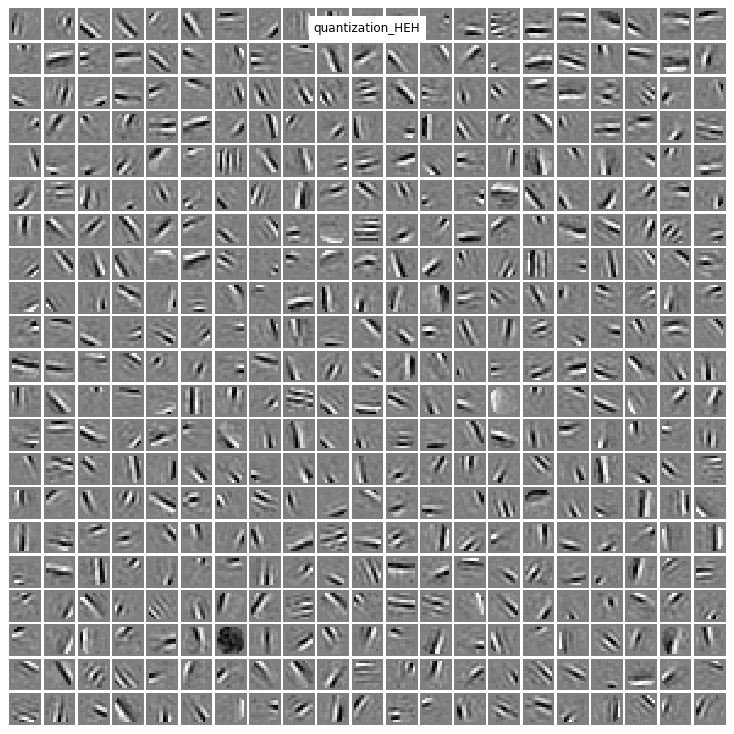

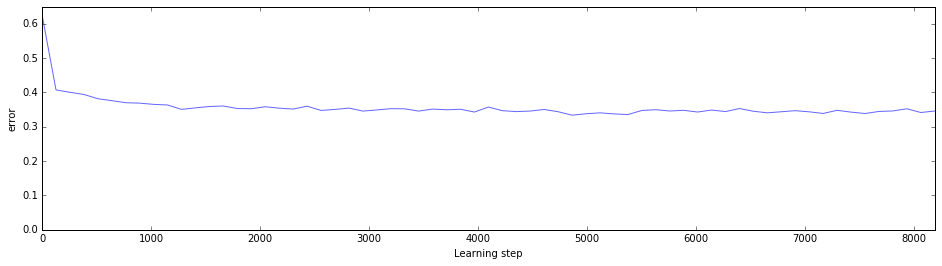

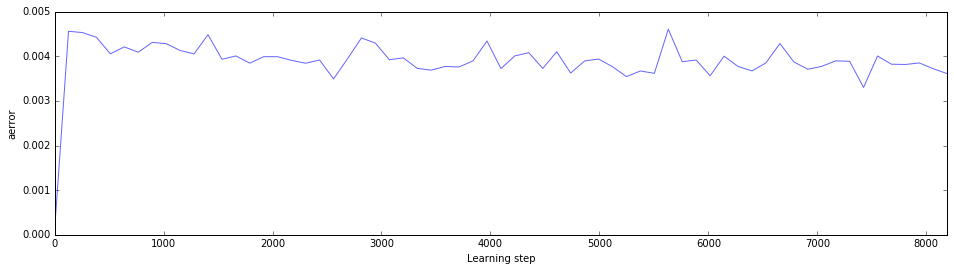

In [9]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_aerror']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [10]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (441, 169)
average of filters =  7.494069471582653e-05 +/- 0.00539573796468987
average energy of filters =  1.0 +/- 9.080336502454232e-17


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 441)
average of codewords =  0.00584029116177724
l0-sparseness of codewords =  0.03375673185941043  ~= l0/M = 0.034013605442176874
average energy of codewords =  0.047764084492343
std of the average of individual patches =  0.0033378736604162966
number of codes, size of reconstructed images =  (256, 169)


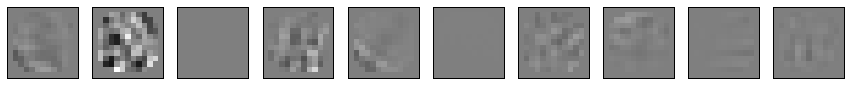

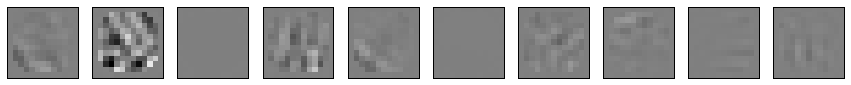

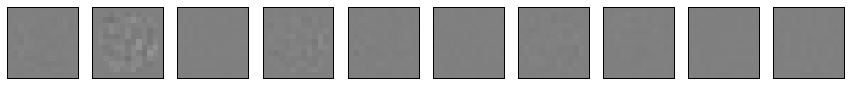

average of data patches =  6.8445000669491905e-06 +/- 0.006296589806284218
average of residual patches =  -0.0003153020382364199 +/- 0.003072532952636025
median energy of data =  0.035260220012700516
average energy of data =  0.06393926190808041 +/- 0.06911706289392534
average error =  -0.0003153020382364199 +/- 0.031980870301635905
average energy of residual =  0.021798155267796146 +/- 0.02340333112072776
median energy of residual =  0.01247023113508449
average gain of coding =  3.087448601995323 +/- 0.931844153175604
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 441)
average of codewords =  0.00584029116177724
l0-sparseness of codewords =  0.03375673185941043  ~= l0/M = 0.034013605442176874
average energy of codewords =  0.047764084492343
std of the average of individual patches =  0.0033378736604162966
number of codes, size of reconstructed images =  (256, 169)


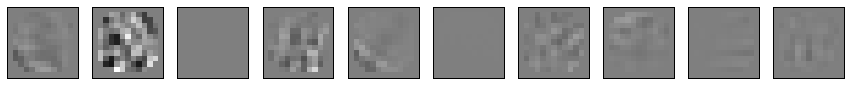

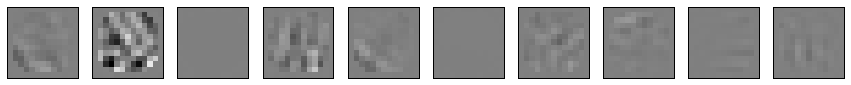

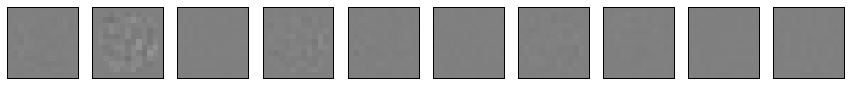

average of data patches =  6.8445000669491905e-06 +/- 0.006296589806284218
average of residual patches =  -0.00031530203823642016 +/- 0.003072532952636025
median energy of data =  0.035260220012700516
average energy of data =  0.06393926190808041 +/- 0.06911706289392534
average error =  -0.00031530203823642016 +/- 0.031980870301635905
average energy of residual =  0.021798155267796146 +/- 0.02340333112072776
median energy of residual =  0.01247023113508449
average gain of coding =  3.087448601995323 +/- 0.9318441531756042
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 441)
average of codewords =  0.005834106657348571
l0-sparseness of codewords =  0.03380102040816327  ~= l0/M = 0.034013605442176874
average energy of codewords =  0.04737871600734164
std of the average of individual patches =  0.00344726641215065
number of codes, size of reconstructed images =  (256, 169)


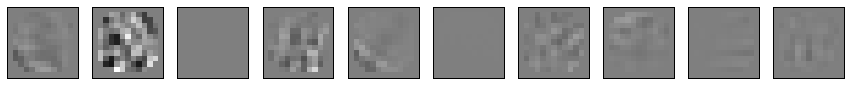

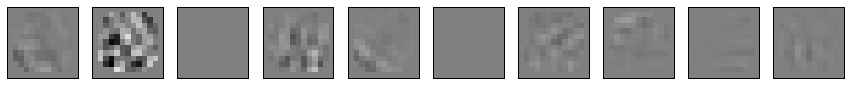

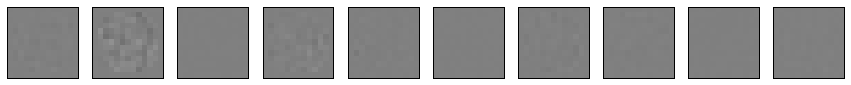

average of data patches =  6.8445000669491905e-06 +/- 0.006296589806284218
average of residual patches =  -9.102300408864578e-06 +/- 0.00401093398735812
median energy of data =  0.035260220012700516
average energy of data =  0.06393926190808041 +/- 0.06911706289392534
average error =  -9.102300408864578e-06 +/- 0.03272833617487023
average energy of residual =  0.022265883512208207 +/- 0.02398696527383084
median energy of residual =  0.012844686700646729
average gain of coding =  3.0449879539337816 +/- 0.9344721413665352


In [11]:
from shl_scripts.shl_encode import mp
nb_quant = 128
record_num_batches = 256
np.random.seed(1973)
indx = np.random.permutation(data.shape[0])[:record_num_batches]
#sparse_code = shl.code(data, dico, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico.P_cum
#P_cum = None
l0_sparseness = 150
l0_sparseness = shl.l0_sparseness

for P_cum, gain in zip([None, P_cum_zeroeffect, dico.P_cum], [np.ones(shl.n_dictionary), None, None]):
    print(50*'🐒')
    sparse_code = mp(data[indx, :], dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('average energy of codewords = ', sparse_code.std(axis=0).mean())
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

    patches = sparse_code @ dico.dictionary
    print('number of codes, size of reconstructed images = ', patches.shape)

    from shl_scripts.shl_tools import show_data
    max_patches = 10
    fig, axs = show_data(data[indx, :][:max_patches, :])
    plt.show()
    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    
    error = (data[indx, :] - patches)
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(data[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
    #SD = np.linalg.norm(data[indx, :])/record_num_batches

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    #print('total energy of data = ', np.sqrt(np.sum(data**2)))
    #print('total deviation of data = ', np.sum(np.abs(data)))
    print('average error = ', error.mean(), '+/-', error.std())
    SE = np.sqrt(np.mean(error**2, axis=1))
    #SE = np.linalg.norm(error)/record_num_batches

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    #print('total energy of residual = ', np.sqrt(np.sum(error**2)))
    #print('total deviation of residual = ', np.sum(np.abs(error)))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

## Quantization of the coefficients

In [12]:
from shl_scripts.shl_learn import get_P_cum
C = 5.
P_cum = get_P_cum(sparse_code, C=C, nb_quant=nb_quant)
P_cum.shape

(441, 128)

In [13]:
P_cum = dico.P_cum
P_cum.shape

(441, 128)

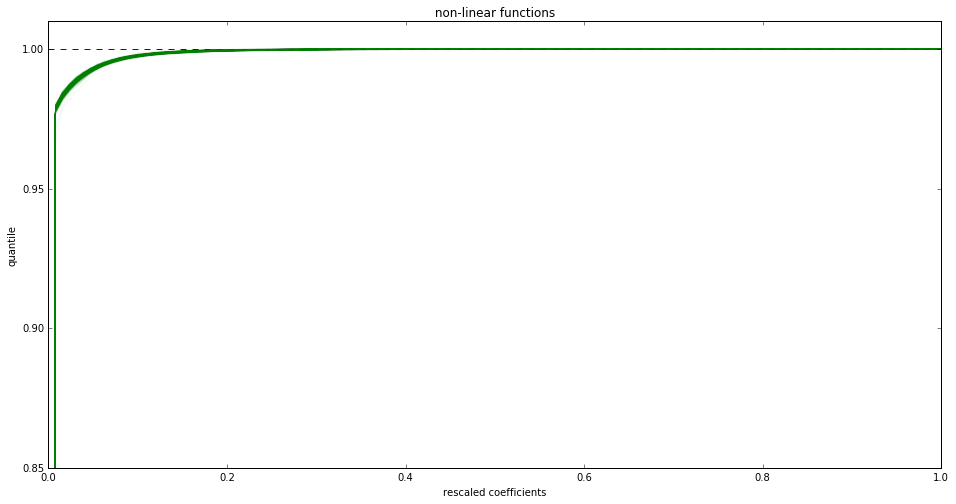

In [14]:
from shl_scripts.shl_tools import plot_P_cum
fig, ax = plot_P_cum(P_cum, verbose=False);
ax.set_ylim(0.85, 1.01);

In [15]:
P_cum.shape

(441, 128)

In [16]:
from shl_scripts.shl_encode import quantile, rescaling
#sparse_code = mp(data, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum)
stick = np.arange(shl.n_dictionary)*nb_quant
q = quantile(P_cum, rescaling(sparse_code, C=C), stick, do_fast=True)

In [17]:
from shl_scripts.shl_encode import inv_quantile, inv_rescaling
q_sparse_code = inv_rescaling(inv_quantile(P_cum, q), C=C)
print('total deviation of coefficients = ', np.mean(np.abs(q_sparse_code-sparse_code)))

total deviation of coefficients =  4.944439491297168e-05


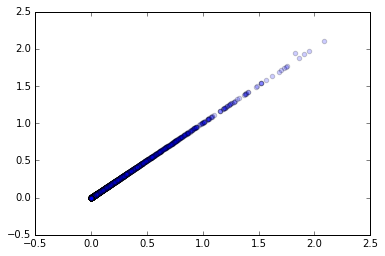

In [18]:
plt.scatter(sparse_code.ravel(), q_sparse_code.ravel(), alpha=.2);

In [19]:
P_cum.mean(axis=0).shape

(128,)

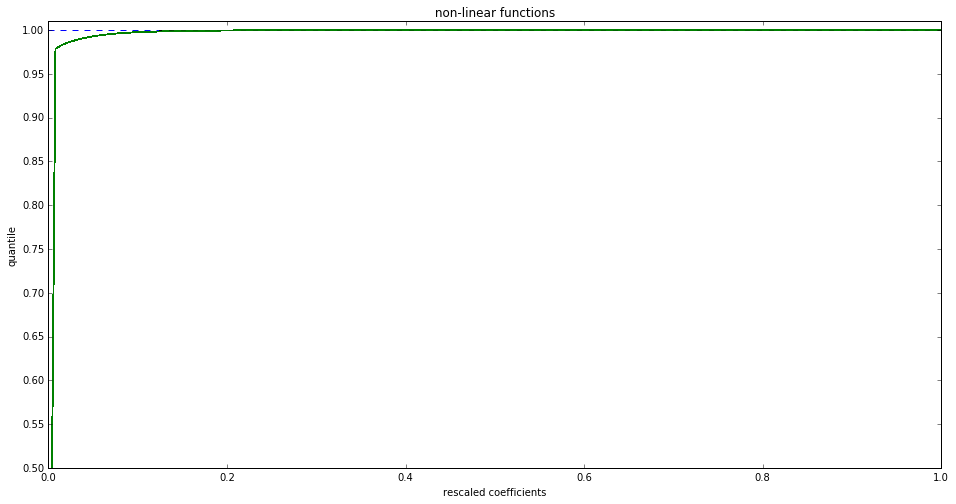

In [20]:
P_cum_mean = P_cum.mean(axis=0)[np.newaxis, :] * np.ones((shl.n_dictionary, nb_quant))
fig, ax = plot_P_cum(P_cum_mean, verbose=False);
ax.set_ylim(0.5, 1.01);

In [21]:
#q_sparse_code = inv_rescaling(inv_quantile(P_cum_mean, q), C=C)
q_sparse_code = inv_rescaling(inv_quantile(P_cum_mean, q), C=C)
print('total deviation of coefficients = ', np.mean(np.abs(sparse_code)))
print('total deviation of coefficients = ', np.mean(np.abs(q_sparse_code-sparse_code)))

total deviation of coefficients =  0.005834106657348571
total deviation of coefficients =  0.0004067645090438361


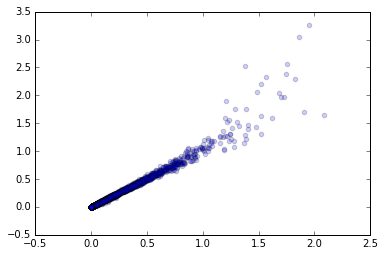

In [22]:
plt.scatter(sparse_code.ravel(), q_sparse_code.ravel(), alpha=.2);

average of data patches =  6.8445000669491905e-06 +/- 0.006296589806284218
average of residual patches =  4.746199399354992e-05 +/- 0.004049844282819407
median energy of data =  0.07650194528258858
average energy of data =  0.07650194528258858 +/- 0.0
average energy of residual =  0.029538911695166353 +/- 0.0
median energy of residual =  0.029538911695166353
average gain of coding =  2.589870137128549 +/- 0.0


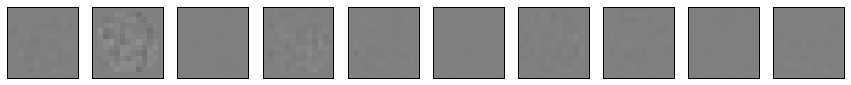

In [23]:
patches = q_sparse_code @ dico.dictionary
error = data[indx, :] - patches
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(data[:max_patches, :])))
print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
#SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
SD = np.linalg.norm(data[indx, :])/record_num_batches
print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())
#print('total energy of data = ', np.sqrt(np.sum(data**2)))
#print('total deviation of data = ', np.sum(np.abs(data)))
#SE = np.sqrt(np.mean(error**2, axis=1))
SE = np.linalg.norm(error)/record_num_batches

print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
#print('total energy of residual = ', np.sqrt(np.sum(error**2)))
#print('total deviation of residual = ', np.sum(np.abs(error)))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

In [24]:
P_cum[0, -2]

0.999999999999999

## Version used

In [25]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.5.2 64bit [GCC 5.4.0 20160609]
IPython 6.2.1
OS Linux 4.13.0 32 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.14.0
shl_scripts 20171221
Tue Feb 13 14:01:53 2018 CET